# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import os
import numpy as np
import torch

if torch.cuda.is_available():
    print("CUDA (Compute Unified Device Architecture) available... ")
else:
    print("CUDA is not available. Training on CPU...")

data_dir = "landmark_images/"
train_dir = os.path.join(data_dir, "train/")
test_dir = os.path.join(data_dir, "test/")

classes = ['01.Blue_Domes_of_Oia', 
           '02.Blue_Mosque', 
           '03.Buckingham_Palace', 
           '04.Christ_the_Redeemer', 
           '05.Colosseum', 
           '06.Death_Valley', 
           '07.Easter_Island', 
           '08.Eiffel_Tower', 
           '09.Golden_Gate_Bridge', 
           '10.Great_Pyramid_of_Giza', 
           '11.Great_Wall_of_China', 
           '12.Ha_Long_Bay', 
           '13.Leaning_Tower_of_Pisa', 
           '14.Machu_Picchu', 
           '15.Mount_Rushmore_National_Memorial', 
           '16.Niagara_Falls', 
           '17.Petra', 
           '18.St._Basil\s_Cathedral', 
           '19.Statue_of_Liberty', 
           '20.Sydney_Opera_House']

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

data_transform = transforms.Compose([
    transforms.RandomResizedCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10), 
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

batch_size, num_workers, valid_size = 20, 0, 0.2

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

loaders_scratch = {}

loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                                       sampler=train_sampler, num_workers=num_workers)
loaders_scratch['valid'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                                       sampler=valid_sampler, num_workers=num_workers)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


CUDA (Compute Unified Device Architecture) available... 


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: Data is preprocessed through a:
- random resize and crop (to 32x32px images), 
- horizontal flip, 
- a rotation of 10 degrees, and 
- a normalization
<br /><br />I decided to augment the dataset through the above stated proccess to get more training images of the similar landmark so that the training could take into account different variations in frame and angle.

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

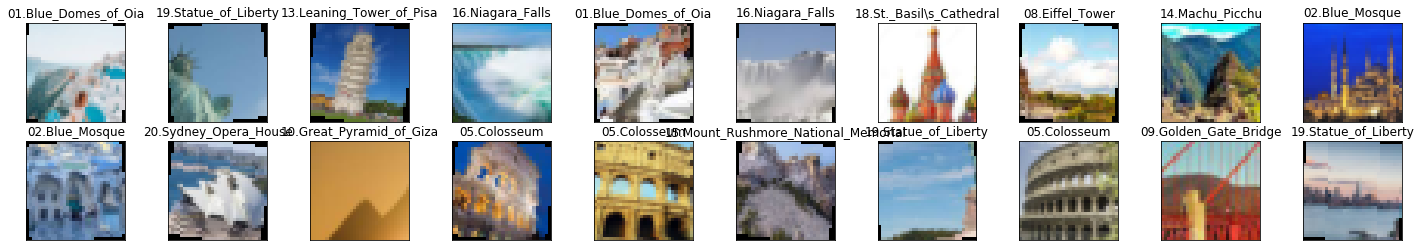

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def imshow(img):
    img = img/2 + 0.5 # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0))) # convert from Tensor image

images, labels = next(iter(loaders_scratch['train']))
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

### Initialize use_cuda variable

In [3]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [4]:
## TODO: select loss function
import torch.nn as nn
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    return optim.SGD(model.parameters(), lr=0.01)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [5]:
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*4*4, 500)
        self.fc2 = nn.Linear(500, 20)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64*4*4)
        x = self.dropout(F.relu(self.fc1(x)))
        x = F.relu(self.fc2(x))
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  I chose to implement the same Network that we saw in the CNN-Augmentation exercice adapting the parameters to fit the 32x32 images as input and an output of 20 clases.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [6]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    time_0 = time.time()
    time_m1 = time_0

    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            print("\rEpoch {} (Training: {:.1%})".format(epoch, (batch_idx+1)/len(loaders['train'])), end="")
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion_scratch(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)
            #train_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            print("\rEpoch {} (Validating: {:.1%})".format(epoch, (batch_idx+1)/len(loaders['valid'])), end="")
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0)
        
        train_loss = train_loss/len(loaders['train'].sampler)
        valid_loss = valid_loss/len(loaders['valid'].sampler)

        # print training/validation statistics
        time_now = time.time()
        print('\rEpoch {:02d}: T. Loss: {:.6f} V. Loss: {:.6f} Elapsed time: {:.1f}s T. time: {:05.1f}s'.format(
            epoch, 
            train_loss,
            valid_loss,
            time_now - time_m1,
            time_now - time_0
            ), end='')
        time_m1 = time_now

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            print(' || [Model saved]'.format())
        else:
            print()
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [7]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch 01: T. Loss: 2.994624 V. Loss: 2.999908 Elapsed time: 1.4s T. time: 001.4s || [Model saved]
Epoch 02: T. Loss: 2.992781 V. Loss: 3.001176 Elapsed time: 1.5s T. time: 002.9s
Epoch 03: T. Loss: 2.987208 V. Loss: 3.001993 Elapsed time: 1.4s T. time: 004.3s
Epoch 04: T. Loss: 2.985163 V. Loss: 3.002993 Elapsed time: 1.4s T. time: 005.7s
Epoch 05: T. Loss: 2.983023 V. Loss: 3.000975 Elapsed time: 1.4s T. time: 007.1s
Epoch 06: T. Loss: 2.978133 V. Loss: 3.004113 Elapsed time: 1.4s T. time: 008.5s
Epoch 07: T. Loss: 2.974034 V. Loss: 2.996912 Elapsed time: 1.4s T. time: 009.9s || [Model saved]
Epoch 08: T. Loss: 2.970259 V. Loss: 3.006226 Elapsed time: 1.4s T. time: 011.4s
Epoch 09: T. Loss: 2.955662 V. Loss: 2.988472 Elapsed time: 1.4s T. time: 012.8s || [Model saved]
Epoch 10: T. Loss: 2.955695 V. Loss: 2.989110 Elapsed time: 1.4s T. time: 014.2s
Epoch 11: T. Loss: 2.939475 V. Loss: 2.989963 Elapsed time: 1.4s T. time: 015.6s
Epoch 12: T. Loss: 2.940683 V. Loss: 2.983633 Elapsed time

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [8]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 100

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch 01: T. Loss: 2.995993 V. Loss: 2.994493 Elapsed time: 1.4s T. time: 001.4s || [Model saved]
Epoch 02: T. Loss: 2.995395 V. Loss: 2.994745 Elapsed time: 1.4s T. time: 002.8s
Epoch 03: T. Loss: 2.994495 V. Loss: 2.994881 Elapsed time: 1.4s T. time: 004.3s
Epoch 04: T. Loss: 2.994385 V. Loss: 2.994754 Elapsed time: 1.4s T. time: 005.7s
Epoch 05: T. Loss: 2.993891 V. Loss: 2.994937 Elapsed time: 1.4s T. time: 007.1s
Epoch 06: T. Loss: 2.993561 V. Loss: 2.995101 Elapsed time: 1.4s T. time: 008.5s
Epoch 07: T. Loss: 2.993673 V. Loss: 2.995339 Elapsed time: 1.4s T. time: 009.9s
Epoch 08: T. Loss: 2.992391 V. Loss: 2.994884 Elapsed time: 1.4s T. time: 011.3s
Epoch 09: T. Loss: 2.992482 V. Loss: 2.994242 Elapsed time: 1.4s T. time: 012.8s || [Model saved]
Epoch 10: T. Loss: 2.991912 V. Loss: 2.994236 Elapsed time: 1.4s T. time: 014.2s || [Model saved]
Epoch 11: T. Loss: 2.990942 V. Loss: 2.994022 Elapsed time: 1.4s T. time: 015.6s || [Model saved]
Epoch 12: T. Loss: 2.990446 V. Loss: 2.99

Epoch 93: T. Loss: 2.074099 V. Loss: 2.426223 Elapsed time: 1.4s T. time: 131.1s
Epoch 94: T. Loss: 2.070904 V. Loss: 2.351659 Elapsed time: 1.4s T. time: 132.5s
Epoch 95: T. Loss: 2.123493 V. Loss: 2.395558 Elapsed time: 1.4s T. time: 133.9s
Epoch 96: T. Loss: 2.037638 V. Loss: 2.400307 Elapsed time: 1.4s T. time: 135.4s
Epoch 97: T. Loss: 2.075360 V. Loss: 2.348924 Elapsed time: 1.4s T. time: 136.7s
Epoch 98: T. Loss: 2.098282 V. Loss: 2.329121 Elapsed time: 1.4s T. time: 138.1s
Epoch 99: T. Loss: 2.003396 V. Loss: 2.552940 Elapsed time: 1.4s T. time: 139.5s
Epoch 100: T. Loss: 2.103721 V. Loss: 2.407315 Elapsed time: 1.4s T. time: 140.9s


### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [9]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.288908


Test Accuracy: 32% (96/296)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [10]:
import numpy as np
import os

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import os
import numpy as np
import torch

use_cuda = torch.cuda.is_available()
if use_cuda:
    print("CUDA (Compute Unified Device Architecture) available... ")
else:
    print("CUDA is not available. Training on CPU...")

data_dir = "landmark_images/"
train_dir = os.path.join(data_dir, "train/")
test_dir = os.path.join(data_dir, "test/")

classes = ['01.Blue_Domes_of_Oia', 
           '02.Blue_Mosque', 
           '03.Buckingham_Palace', 
           '04.Christ_the_Redeemer', 
           '05.Colosseum', 
           '06.Death_Valley', 
           '07.Easter_Island', 
           '08.Eiffel_Tower', 
           '09.Golden_Gate_Bridge', 
           '10.Great_Pyramid_of_Giza', 
           '11.Great_Wall_of_China', 
           '12.Ha_Long_Bay', 
           '13.Leaning_Tower_of_Pisa', 
           '14.Machu_Picchu', 
           '15.Mount_Rushmore_National_Memorial', 
           '16.Niagara_Falls', 
           '17.Petra', 
           '18.St._Basil\s_Cathedral', 
           '19.Statue_of_Liberty', 
           '20.Sydney_Opera_House']

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

batch_size, num_workers, valid_size = 20, 0, 0.2

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

loaders_transfer = {}

loaders_transfer['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                                       sampler=train_sampler, num_workers=num_workers)
loaders_transfer['valid'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                                       sampler=valid_sampler, num_workers=num_workers)
loaders_transfer['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

CUDA (Compute Unified Device Architecture) available... 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [11]:
## TODO: select loss function

import torch.nn as nn

criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.SGD(model.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [12]:
## TODO: Specify model architecture

from torchvision import models

model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model_transfer.classifier[6] = last_layer

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  As it has been seen in the transfer_learning exercise VGG-16 mainly has three parts: convolution, Pooling, and fully connected layers with pretrained weights and biases that we can use to get features from images. The last fully conected layer let us train the last layer's weights so as to learn to identify from our group of images (20 classes of images defining landmarks).

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [13]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

num_epochs = 5

# reset the model parameters
#model_transfer.apply(default_weight_init)

# train the model
model_transfer = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), criterion_transfer, use_cuda, 'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch 01: T. Loss: 2.962670 V. Loss: 2.764378 Elapsed time: 19.8s T. time: 019.8s || [Model saved]
Epoch 02: T. Loss: 2.705253 V. Loss: 2.536910 Elapsed time: 20.6s T. time: 040.4s || [Model saved]
Epoch 03: T. Loss: 2.470204 V. Loss: 2.366265 Elapsed time: 20.6s T. time: 061.0s || [Model saved]
Epoch 04: T. Loss: 2.263195 V. Loss: 2.115006 Elapsed time: 20.5s T. time: 081.5s || [Model saved]
Epoch 05: T. Loss: 2.065363 V. Loss: 1.985328 Elapsed time: 20.6s T. time: 102.1s || [Model saved]


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [14]:
# load the model that got the best validation accuracy

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.984945


Test Accuracy: 72% (214/296)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [15]:
import cv2
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

model_transfer.load_state_dict(torch.load('model_transfer.pt'))

def predict_landmarks(img_path, k, max_size=400, shape=None):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    image = Image.open(img_path).convert('RGB')
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
    
    in_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor()
    ])
    
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        image = image.cuda()
    
    with torch.no_grad():
        output = model_transfer(image)
        top_p, top_class = output.topk(k, dim=1)
        topk_ = []
        for i in range(k):
            topk_ += [classes[top_class[0][i].item()]]
        print(topk_)

# test on a sample image
predict_landmarks('landmark_images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['09.Golden_Gate_Bridge', '06.Death_Valley', '03.Buckingham_Palace', '12.Ha_Long_Bay', '10.Great_Pyramid_of_Giza']


### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

['06.Death_Valley', '10.Great_Pyramid_of_Giza', '12.Ha_Long_Bay']


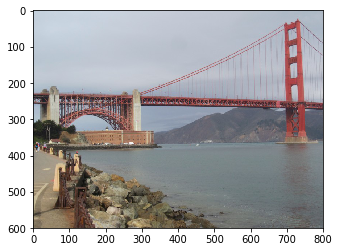

In [16]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    im = mpimg.imread(img_path)
    plt.imshow(im)
        
# test on a sample image
suggest_locations('landmark_images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The outcome is impresive and I am glad it is that way. I would try nonetheless to improve results by taking care of which images are used for training, training on more epochs and using augmentation in a more extensive way. Another possible improvement would be to change the model network adding more convolutional layers...

['01.Blue_Domes_of_Oia', '20.Sydney_Opera_House', '19.Statue_of_Liberty']


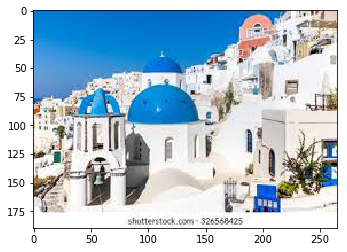

In [17]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
suggest_locations("landmark_images/test/" + str(classes[0]) + "/00.jpeg")

['03.Buckingham_Palace', '11.Great_Wall_of_China', '18.St._Basil\\s_Cathedral']


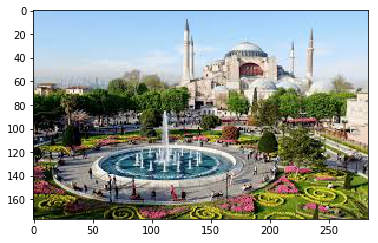

In [18]:
suggest_locations("landmark_images/test/" + str(classes[1]) + "/00.jpeg")

['03.Buckingham_Palace', '05.Colosseum', '02.Blue_Mosque']


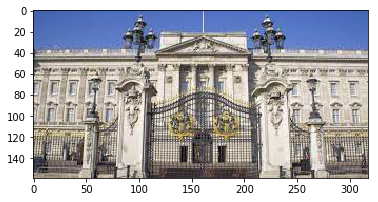

In [19]:
suggest_locations("landmark_images/test/" + str(classes[2]) + "/00.jpeg")

['14.Machu_Picchu', '11.Great_Wall_of_China', '12.Ha_Long_Bay']


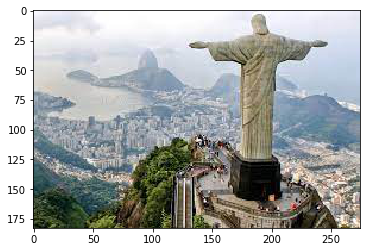

In [20]:
suggest_locations("landmark_images/test/" + str(classes[3]) + "/00.jpeg")